In [1]:
from keras.models import load_model
import pandas as pd
import numpy as np
from PIL import Image,ImageOps
import CharacterSegmentation as cs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os

In [2]:
INPUT_IMAGE = './input/input_2.jpg'
SEGMENTED_OUTPUT_DIR = './segmented/'
EMNIST_PATH = './data/emnist/'
MODEL_PATH = './model/haistudocr.h5'
mapping_processed = EMNIST_PATH + 'processed-mapping.csv'

## Character Segmentation

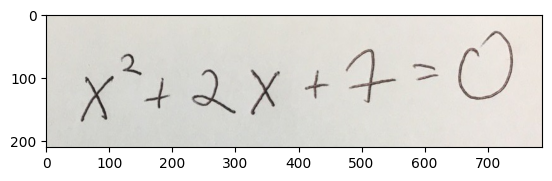

In [3]:
img = Image.open(INPUT_IMAGE)
plt.imshow(img)

In [4]:
cs.image_segmentation(INPUT_IMAGE)


........Program Initiated.......


 Resizing Image........
#---------Image Info:--------#
	Height = 352 
	Width = 1320
#----------------------------#
Applying Adaptive Threshold with kernel :- 21 X 21
Noise Removal From Image.........
Beginning Character Semenation..............

Given Text has   #  1  #   no. of lines

Average Width of Each Letter:-  87.2


In [5]:
segmented_images = []
files = [f for r, d, f in os.walk(SEGMENTED_OUTPUT_DIR)][0]
for f in files:
    segmented_images.append(Image.open(SEGMENTED_OUTPUT_DIR + f))

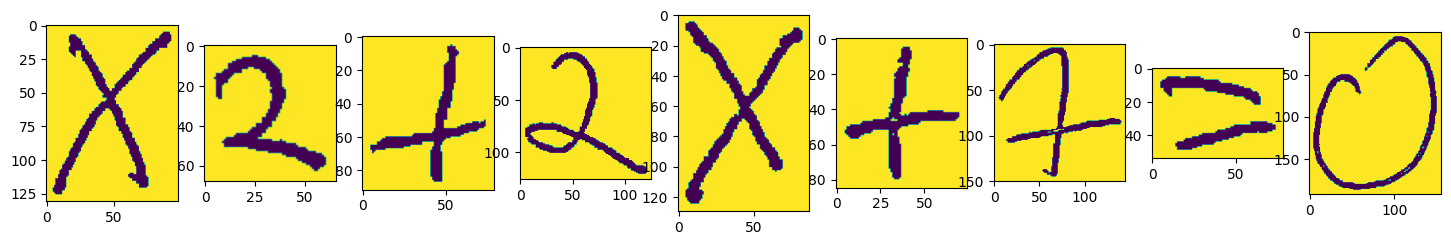

In [6]:
figure(figsize=(18,18))

size = len(segmented_images)
for i in range(size):
    img = segmented_images[i]
    plt.subplot(2, size, i + 1)
    plt.imshow(img)

## Making images bolder to avoid artifacts on resizing

In [7]:
import cv2
import numpy as np

files = [f for r, d, f in os.walk(SEGMENTED_OUTPUT_DIR)][0]
for f in files:
    filename = SEGMENTED_OUTPUT_DIR + f
    img = cv2.imread(filename, 0)

    kernel = np.ones((2,2), np.uint8)
    dilation = cv2.erode(img, kernel, iterations = 1)
    cv2.imwrite(filename, dilation)

## Converting Segmented Characters to EMNIST format

In [8]:
def img2emnist(filepath, char_code):
    img = Image.open(filepath).resize((28, 28))
    inv_img = ImageOps.invert(img)
    
    flatten = np.array(inv_img).flatten()
    flatten = flatten / 255
    flatten = np.where(flatten > 0.5, 1, 0)
    
    csv_img = ','.join([str(num) for num in flatten])
    csv_str = '{},{}'.format(char_code, csv_img)
    return csv_str

In [9]:
temp_filename = 'test.csv'
if os.path.exists(temp_filename):
    os.remove(temp_filename)

f_test = open(temp_filename, 'a+')
column_names = ','.join(["label"] + ["pixel" + str(i) for i in range(784)])
print(column_names, file=f_test)

files = [f for r, d, f in os.walk(SEGMENTED_OUTPUT_DIR)][0]
for f in files:
    csv = img2emnist(SEGMENTED_OUTPUT_DIR + f, -1)
    print(csv, file=f_test)
    
f_test.close()

In [10]:
test_df = pd.read_csv(temp_filename)
test_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Character Recognition

In [11]:
data = pd.read_csv(temp_filename)
X_data = data.drop(labels = ["label"], axis = 1)
X_data = X_data.values.reshape(-1,28,28,1)

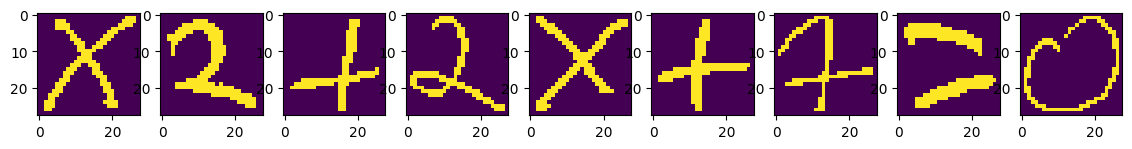

In [12]:
figure(figsize=(14,14))

size = X_data.shape[0]
for i in range(size):
    v = X_data[i][:,:,0].astype('uint8')
    img = Image.fromarray(255* v)
    
    plt.subplot(2, size, i + 1)
    plt.imshow(img)

In [13]:
df = pd.read_csv(mapping_processed)
code2char = {}
for index, row in df.iterrows():
    code2char[row['id']] = row['char']

In [14]:
model = load_model(MODEL_PATH)

In [15]:
# predict results
results = model.predict(X_data)

# select the index with the maximum probability
results = np.argmax(results, axis = 1)
parsed_str = ""
for r in results:
    parsed_str += code2char[r]

parsed_str

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


'X2t2Xtf=0'